# PCA outlier on decisionnel

In [1]:
import sys,os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.patches as mpatches
import random

In [2]:
path_images = 'D:\\Users\\S37283\\Documents\\Outlier detection'
header=['idcli_horus', 'topCSPplus', 'revenu', 'gold', 'topstpub', 'top_in', 'top_out', 'prodres_T1', 'prodamo_T1', 'prod_T1', 'top_port', 'top_fixe', 'emailvalide', 'validemail', 'ancclient', 'derprod_arch', 'cli_actif', 'cli_inactif', 'top_homme', 'top_femme', 'habit_prop', 'habit_loc', 'habit_aut', 'csp_actif', 'csp_inact', 'csp_sup', 'csp_ret', 'csp_emp', 'csp_ouv', 'csp_resp', 'sitfam_C', 'sitfam_M', 'sitfam_D', 'sitfam_U', 'sitfam_V', 'sitfam_S', 'sitfam_DS', 'sitfam_DSV', 'sitfam_MU', 'agiopb12m', 'agiovac12m', 'agiorccc12m', 'agiorccl12m', 'agiopb6m', 'agiovac6m', 'agiorccc6m', 'agiorccl6m', 'encpb_m1', 'encvac_m1', 'encrccc_m1', 'encrccl_m1', 'encleas_m1', 'disporccl_m1', 'encpb_m2', 'encvac_m2', 'encrccc_m2', 'encrccl_m2', 'encleas_m2', 'disporccc_m2', 'disporccl_m2', 'encpb_m3', 'encvac_m3', 'encrccc_m3', 'encrccl_m3', 'encleas_m3', 'disporccc_m3', 'disporccl_m3', 'encpb_m4', 'encvac_m4', 'encrccc_m4', 'encrccl_m4', 'encleas_m4', 'disporccc_m4', 'disporccl_m4', 'encpb_m5', 'encvac_m5', 'encrccc_m5', 'encrccl_m5', 'encleas_m5', 'disporccc_m5', 'disporccl_m5', 'encpb_m6', 'encvac_m6', 'encrccc_m6', 'encrccl_m6', 'encleas_m6', 'disporccc_m6', 'disporccl_m6', 'encpb_m7', 'encvac_m7', 'encrccc_m7', 'encrccl_m7', 'encleas_m7', 'disporccc_m7', 'disporccl_m7', 'encpb_m8', 'encvac_m8', 'encrccc_m8', 'encrccl_m8', 'encleas_m8', 'disporccc_m8', 'disporccl_m8', 'encpb_m9', 'encvac_m9', 'encrccc_m9', 'encrccl_m9', 'encleas_m9', 'disporccc_m9', 'disporccl_m9', 'encpb_m10', 'encvac_m10', 'encrccc_m10', 'encrccl_m10', 'encleas_m10', 'disporccc_m10', 'disporccl_m10', 'encpb_m11', 'encvac_m11', 'encrccc_m11', 'encrccl_m11', 'encleas_m11', 'disporccc_m11', 'disporccl_m11', 'encpb_m12', 'encvac_m12', 'encrccc_m12', 'encrccl_m12', 'encleas_m12', 'disporccc_m12', 'disporccl_m12', 'agio12m', 'agio6m', 'agioamo12m', 'agioamo6m', 'agiores12m', 'agiores6m', 'enc_m1', 'encamo_m1', 'encres_m1', 'dispo_m1', 'enc_m2', 'encamo_m2', 'encres_m2', 'dispo_m2', 'enc_m3', 'encamo_m3', 'encres_m3', 'dispo_m3', 'enc_m4', 'encamo_m4', 'encres_m4', 'dispo_m4', 'enc_m5', 'encamo_m5', 'encres_m5', 'dispo_m5', 'enc_m6', 'encamo_m6', 'encres_m6', 'dispo_m6', 'enc_m7', 'encamo_m7', 'encres_m7', 'dispo_m7', 'enc_m8', 'encamo_m8', 'encres_m8', 'dispo_m8', 'enc_m9', 'encamo_m9', 'encres_m9', 'dispo_m9', 'enc_m10', 'encamo_m10', 'encres_m10', 'dispo_m10', 'enc_m11', 'encamo_m11', 'encres_m11', 'dispo_m11', 'enc_m12', 'encamo_m12', 'encres_m12', 'dispo_m12', 'nbmenc12M', 'nbmenc6M', 'nbmencamo12M', 'nbmencamo6M', 'nbmencres12M', 'nbmencres6M', 'nbmdispo12M', 'nbmdispo6M', 'senc12M', 'senc6M', 'sencamo12M', 'sencamo6M', 'sencpb12M', 'sencpb6M', 'sencvac12M', 'sencvac6M', 'sencres12M', 'sencres6M', 'sencrccc12M', 'sencrccc6M', 'sencrccl12M', 'sencrccl6M', 'sdispo12M', 'sdispo6M', 'sdisporccc12M', 'sdisporccc6M', 'sdisporccl12M', 'sdisporccl6M', 'moyenc12M', 'moyencamo12M', 'moyencpb12M', 'moyencvac12M', 'moyencres12M', 'moyencrccc12M', 'moyencrccl12M', 'moydispo12M', 'moydisporccc12M', 'moydisporccl12M', 'moyenc6M', 'moyencamo6M', 'moyencpb6M', 'moyencvac6M', 'moyencres6M', 'moyencrccc6M', 'moyencrccl6M', 'moydispo6M', 'moydisporccc6M', 'moydisporccl6M', 'agiopb_m1', 'agiovac_m1', 'agiorccc_m1', 'agiorccl_m1', 'agiopb_m2', 'agiovac_m2', 'agiorccc_m2', 'agiorccl_m2', 'agiopb_m3', 'agiovac_m3', 'agiorccc_m3', 'agiorccl_m3', 'agiopb_m4', 'agiovac_m4', 'agiorccc_m4', 'agiorccl_m4', 'agiopb_m5', 'agiovac_m5', 'agiorccc_m5', 'agiorccl_m5', 'agiopb_m6', 'agiovac_m6', 'agiorccc_m6', 'agiorccl_m6', 'agiopb_m7', 'agiovac_m7', 'agiorccc_m7', 'agiorccl_m7', 'agiopb_m8', 'agiovac_m8', 'agiorccc_m8', 'agiorccl_m8', 'agiopb_m9', 'agiovac_m9', 'agiorccc_m9', 'agiorccl_m9', 'agiopb_m10', 'agiovac_m10', 'agiorccc_m10', 'agiorccl_m10', 'agiopb_m11', 'agiovac_m11', 'agiorccc_m11', 'agiorccl_m11', 'agiopb_m12', 'agiovac_m12', 'agiorccc_m12', 'agiorccl_m12', 'agio_m1', 'agioamo_m1', 'agiores_m1', 'agio_m2', 'agioamo_m2', 'agiores_m2', 'agio_m3', 'agioamo_m3', 'agiores_m3', 'agio_m4', 'agioamo_m4', 'agiores_m4', 'agio_m5', 'agioamo_m5', 'agiores_m5', 'agio_m6', 'agioamo_m6', 'agiores_m6', 'agio_m7', 'agioamo_m7', 'agiores_m7', 'agio_m8', 'agioamo_m8', 'agiores_m8', 'agio_m9', 'agioamo_m9', 'agiores_m9', 'agio_m10', 'agioamo_m10', 'agiores_m10', 'agio_m11', 'agioamo_m11', 'agiores_m11', 'agio_m12', 'agioamo_m12', 'agiores_m12', 'nbmagio12M', 'nbmagio6M', 'nbmagioamo12M', 'nbmagioamo6M', 'nbmagiores12M', 'nbmagiores6M', 'minagio6M', 'minagio12M', 'maxagio6M', 'maxagio12M', 'minagiopb6M', 'minagiopb12M', 'maxagiopb6M', 'maxagiopb12M', 'minagiovac6M', 'minagiovac12M', 'maxagiovac6M', 'maxagiovac12M', 'minagiorccc6M', 'minagiorccc12M', 'maxagiorccc6M', 'maxagiorccc12M', 'minagiorccl6M', 'minagiorccl12M', 'maxagiorccl6M', 'maxagiorccl12M', 'minagioamo6M', 'minagioamo12M', 'maxagioamo6M', 'maxagioamo12M', 'minagiores6M', 'minagiores12M', 'maxagiores6M', 'maxagiores12M', 'minenc6M', 'minenc12M', 'maxenc6M', 'maxenc12M', 'minencpb6M', 'minencpb12M', 'maxencpb6M', 'maxencpb12M', 'minencvac6M', 'minencvac12M', 'maxencvac6M', 'maxencvac12M', 'minencrccc6M', 'minencrccc12M', 'maxencrccc6M', 'maxencrccc12M', 'minencrccl6M', 'minencrccl12M', 'maxencrccl6M', 'maxencrccl12M', 'minencamo6M', 'minencamo12M', 'maxencamo6M', 'maxencamo12M', 'minencres6M', 'minencres12M', 'maxencres6M', 'maxencres12M', 'mindispo6M', 'mindispo12M', 'maxdispo6M', 'maxdispo12M', 'maxdisporccc6M', 'maxdisporccc12M', 'mindisporccl6M', 'mindisporccl12M', 'maxdisporccl6M', 'maxdisporccl12M', 'nbpb', 'nbvac', 'nbleas', 'nbrccc', 'nbrccl', 'nbpbarc', 'nbvacarc', 'nbleasarc', 'nbrcccarc', 'nbrcclarc', 'nbpbnarc', 'nbvacnarc', 'nbleasnarc', 'nbrcccnarc', 'nbrcclnarc', 'toppb', 'topvac', 'topleas', 'toprccc', 'toppbarc', 'topvacarc', 'topleasarc', 'toprcccarc', 'toprcclarc', 'toppbnarc', 'topvacnarc', 'topleasnarc', 'toprcccnarc', 'toprcclnarc', 'nbdemat', 'nbdematarc', 'nbdematnarc', 'topdemat', 'topdematarc', 'topdematnarc', 'nbcpthl', 'nbcptl', 'nbamo', 'nbres', 'nbcpthlarc', 'nbcptlarc', 'nbamoarc', 'nbresarc', 'nbcpthlnarc', 'nbcptlnarc', 'nbamonarc', 'nbresnarc', 'topamo', 'topamoarc', 'topresarc', 'topamonarc', 'topresnarc', 'mtpb', 'mtvac', 'mtrccc', 'mtrccl', 'mtpbarc', 'mtvacarc', 'mtrcccarc', 'mtrcclarc', 'mtpbnarc', 'mtvacnarc', 'mtrcccnarc', 'mtrcclnarc', 'mtamo', 'mtres', 'mtamoarc', 'mtresarc', 'mtamonarc', 'mtresnarc', 'mtminpb', 'mtminvac', 'mtminrccc', 'mtminrccl', 'mtmaxpb', 'mtmaxvac', 'mtmaxrccc', 'mtmaxrccl', 'mtminamo', 'mtminres', 'mtmaxamo', 'mtmaxres', 'recderpb', 'recdervac', 'recderrccc', 'recderrccl', 'recdarcpb', 'recdarcvac', 'recdarcrccc', 'recdarcrccl', 'recdercpt', 'recderamo', 'recderres', 'recdarccpt', 'recdarcamo', 'recdarcres', 'nbsoll_m1', 'nbsmail_m1', 'nbsemail_m1', 'nbsas_m1', 'nbsanim_m1', 'nbscross_m1', 'nbsoll_m2', 'nbsmail_m2', 'nbsemail_m2', 'nbsas_m2', 'nbsanim_m2', 'nbscross_m2', 'nbsoll_m3', 'nbsmail_m3', 'nbsemail_m3', 'nbsas_m3', 'nbsanim_m3', 'nbscross_m3', 'nbsoll_m4', 'nbsmail_m4', 'nbsemail_m4', 'nbsas_m4', 'nbsanim_m4', 'nbscross_m4', 'nbsoll_m5', 'nbsmail_m5', 'nbsemail_m5', 'nbsas_m5', 'nbsanim_m5', 'nbscross_m5', 'nbsoll_m6', 'nbsmail_m6', 'nbsemail_m6', 'nbsas_m6', 'nbsanim_m6', 'nbscross_m6', 'nbsoll_m7', 'nbsmail_m7', 'nbsemail_m7', 'nbsas_m7', 'nbsanim_m7', 'nbscross_m7', 'nbsoll_m8', 'nbsmail_m8', 'nbsemail_m8', 'nbsas_m8', 'nbsanim_m8', 'nbscross_m8', 'nbsoll_m9', 'nbsmail_m9', 'nbsemail_m9', 'nbsas_m9', 'nbsanim_m9', 'nbscross_m9', 'nbsoll_m10', 'nbsmail_m10', 'nbsemail_m10', 'nbsas_m10', 'nbsanim_m10', 'nbscross_m10', 'nbsoll_m11', 'nbsmail_m11', 'nbsemail_m11', 'nbsas_m11', 'nbsanim_m11', 'nbscross_m11', 'nbmsoll12M', 'nbmsoll6M', 'nbmsoll3M', 'nbmsmail12M', 'nbmsmail6M', 'nbmsmail3M', 'nbmsemail12M', 'nbmsemail6M', 'nbmsemail3M', 'nbmssms12M', 'nbmssms6M', 'nbmssms3M', 'nbmsas12M', 'nbmsas6M', 'nbmsas3M', 'nbmsanim12M', 'nbmsanim6M', 'nbmsanim3M', 'nbmscross12M', 'nbmscross6M', 'nbmscross3M', 'nbsoll3M', 'nbsoll6M', 'nbsoll12M', 'nbsanim3M', 'nbsanim6M', 'nbsanim12M', 'nbscross3M', 'nbscross6M', 'nbscross12M', 'nbsmail3M', 'nbsmail6M', 'nbsmail12M', 'nbsemail3M', 'nbsemail6M', 'nbsemail12M', 'nbssms3M', 'nbssms6M', 'nbssms12M', 'nbsas3M', 'nbsas6M', 'nbsas12M', 'maxnbsoll3M', 'maxnbsoll6M', 'maxnbsoll12M', 'minnbsoll3M', 'minnbsoll6M', 'maxnbsanim3M', 'maxnbsanim6M', 'maxnbsanim12M', 'minnbsanim3M', 'minnbsanim6M', 'maxnbscross3M', 'maxnbscross6M', 'maxnbscross12M', 'minnbscross3M', 'minnbscross6M', 'maxnbsmail3M', 'maxnbsmail6M', 'maxnbsmail12M', 'minnbsmail3M', 'minnbsmail6M', 'maxnbsemail3M', 'maxnbsemail6M', 'maxnbsemail12M', 'minnbsemail3M', 'minnbsemail6M', 'nbae_m1', 'nbaeds_m1', 'nbaems_m1', 'nbaefs_m1', 'nbaeam_m1', 'nbaepm_m1', 'nbae_m2', 'nbaeds_m2', 'nbaems_m2', 'nbaefs_m2', 'nbaeam_m2', 'nbaepm_m2', 'nbae_m3', 'nbaeds_m3', 'nbaems_m3', 'nbaefs_m3', 'nbaeam_m3', 'nbaepm_m3', 'nbae_m4', 'nbaeds_m4', 'nbaems_m4', 'nbaefs_m4', 'nbaeam_m4', 'nbaepm_m4', 'nbae_m5', 'nbaeds_m5', 'nbaems_m5', 'nbaefs_m5', 'nbaeam_m5', 'nbaepm_m5', 'nbae_m6', 'nbaeds_m6', 'nbaems_m6', 'nbaefs_m6', 'nbaeam_m6', 'nbaepm_m6', 'nbae_m7', 'nbaeds_m7', 'nbaems_m7', 'nbaefs_m7', 'nbaeam_m7', 'nbaepm_m7', 'nbae_m8', 'nbaeds_m8', 'nbaems_m8', 'nbaefs_m8', 'nbaeam_m8', 'nbaepm_m8', 'nbae_m9', 'nbaeds_m9', 'nbaems_m9', 'nbaefs_m9', 'nbaeam_m9', 'nbaepm_m9', 'nbae_m10', 'nbaeds_m10', 'nbaems_m10', 'nbaefs_m10', 'nbaeam_m10', 'nbaepm_m10', 'nbae_m11', 'nbaeds_m11', 'nbaems_m11', 'nbaefs_m11', 'nbaeam_m11', 'nbaepm_m11', 'nbae_m12', 'nbaeds_m12', 'nbaems_m12', 'nbaefs_m12', 'nbaeam_m12', 'nbaepm_m12', 'nbmae12M', 'nbmae6M', 'nbmae3M', 'nbmaeds12M', 'nbmaeds6M', 'nbmaeds3M', 'nbmaems12M', 'nbmaems6M', 'nbmaems3M', 'nbmaefs12M', 'nbmaefs6M', 'nbmaefs3M', 'nbmaeam12M', 'nbmaeam6M', 'nbmaeam3M', 'nbmaepm12M', 'nbmaepm6M', 'nbmaepm3M', 'nbae3M', 'nbae6M', 'nbae12M', 'maxnbae3M', 'maxnbae6M', 'maxnbae12M', 'nbaeds3M', 'nbaeds6M', 'nbaeds12M', 'maxnbaeds3M', 'maxnbaeds6M', 'maxnbaeds12M', 'nbaems3M', 'nbaems6M', 'nbaems12M', 'maxnbaems3M', 'maxnbaems6M', 'maxnbaems12M', 'nbaefs3M', 'nbaefs6M', 'nbaefs12M', 'maxnbaefs3M', 'maxnbaefs6M', 'maxnbaefs12M', 'nbaeam3M', 'nbaeam6M', 'nbaeam12M', 'maxnbaeam3M', 'maxnbaeam6M', 'maxnbaeam12M', 'nbaepm3M', 'nbaepm6M', 'nbaepm12M', 'maxnbaepm3M', 'maxnbaepm6M', 'maxnbaepm12M', 'topA3', 'topB4', 'topB5', 'topF5', 'topF6', 'topM2', 'prodmagrccl_m1', 'prodtresrccl_m1', 'prodcartrccl_m1', 'prodmagres_m1', 'prodtresres_m1', 'prodcartres_m1', 'prodrccl_m1', 'prodres_m1', 'prodmagrccl_m2', 'prodtresrccc_m2', 'prodtresrccl_m2', 'prodcartrccl_m2', 'prodmagres_m2', 'prodtresres_m2', 'prodcartres_m2', 'prodrccc_m2', 'prodrccl_m2', 'prodres_m2', 'prodmagrccc_m3', 'prodmagrccl_m3', 'prodtresrccc_m3', 'prodtresrccl_m3', 'prodcartrccl_m3', 'prodmagres_m3', 'prodtresres_m3', 'prodcartres_m3', 'prodrccc_m3', 'prodrccl_m3', 'prodres_m3', 'prodmagrccl_m4', 'prodtresrccc_m4', 'prodtresrccl_m4', 'prodcartrccl_m4', 'prodmagres_m4', 'prodtresres_m4', 'prodcartres_m4', 'prodrccc_m4', 'prodrccl_m4', 'prodres_m4', 'prodmagrccl_m5', 'prodtresrccc_m5', 'prodtresrccl_m5', 'prodcartrccl_m5', 'prodmagres_m5', 'prodtresres_m5', 'prodcartres_m5', 'prodrccc_m5', 'prodrccl_m5', 'prodres_m5', 'prodmagrccl_m6', 'prodtresrccc_m6', 'prodtresrccl_m6', 'prodcartrccc_m6', 'prodcartrccl_m6', 'prodmagres_m6', 'prodtresres_m6', 'prodcartres_m6', 'prodrccc_m6', 'prodrccl_m6', 'prodres_m6', 'prodmagrccl_m7', 'prodtresrccc_m7', 'prodtresrccl_m7', 'prodcartrccc_m7', 'prodcartrccl_m7', 'prodmagres_m7', 'prodtresres_m7', 'prodcartres_m7', 'prodrccc_m7', 'prodrccl_m7', 'prodres_m7', 'prodmagrccl_m8', 'prodtresrccc_m8', 'prodtresrccl_m8', 'prodcartrccc_m8', 'prodcartrccl_m8', 'prodmagres_m8', 'prodtresres_m8', 'prodcartres_m8', 'prodrccc_m8', 'prodrccl_m8', 'prodres_m8', 'prodmagrccl_m9', 'prodtresrccc_m9', 'prodtresrccl_m9', 'prodcartrccc_m9', 'prodcartrccl_m9', 'prodmagres_m9', 'prodtresres_m9', 'prodcartres_m9', 'prodrccc_m9', 'prodrccl_m9', 'prodres_m9', 'prodmagrccl_m10', 'prodtresrccc_m10', 'prodtresrccl_m10', 'prodcartrccc_m10', 'prodcartrccl_m10', 'prodmagres_m10', 'prodtresres_m10', 'prodcartres_m10', 'prodrccc_m10', 'prodrccl_m10', 'prodres_m10', 'prodmagrccl_m11', 'prodtresrccc_m11', 'prodtresrccl_m11', 'prodcartrccc_m11', 'prodcartrccl_m11', 'prodmagres_m11', 'prodtresres_m11', 'prodcartres_m11', 'prodrccc_m11', 'prodrccl_m11', 'prodres_m11', 'prodmagrccc_m12', 'prodmagrccl_m12', 'prodtresrccc_m12', 'prodtresrccl_m12', 'prodcartrccc_m12', 'prodcartrccl_m12', 'prodmagres_m12', 'prodtresres_m12', 'prodcartres_m12', 'prodrccc_m12', 'prodrccl_m12', 'prodres_m12', 'nbmpres12M', 'nbmpres6M', 'nbmprccc12M', 'nbmprccc6M', 'nbmprccl12M', 'nbmprccl6M', 'nbmpmagres12M', 'nbmpmagres6M', 'nbmptresres12M', 'nbmptresres6M', 'nbmpcartres12M', 'nbmpcartres6M', 'nbmpmagrccc12M', 'nbmpmagrccc6M', 'nbmptresrccc12M', 'nbmptresrccc6M', 'nbmpcartrccc12M', 'nbmpcartrccc6M', 'nbmpmagrccl12M', 'nbmpmagrccl6M', 'nbmptresrccl12M', 'nbmptresrccl6M', 'nbmpcartrccl12M', 'nbmpcartrccl6M', 'spres12M', 'spres6M', 'sprccc12M', 'sprccc6M', 'sprccl12M', 'sprccl6M', 'spmagres12M', 'spmagres6M', 'sptresres12M', 'sptresres6M', 'spcartres12M', 'spcartres6M', 'spmagrccc12M', 'spmagrccc6M', 'sptresrccc12M', 'sptresrccc6M', 'spcartrccc12M', 'spcartrccc6M', 'spmagrccl12M', 'spmagrccl6M', 'sptresrccl12M', 'sptresrccl6M', 'spcartrccl12M', 'spcartrccl6M', 'minprodres6M', 'minprodres12M', 'maxprodres6M', 'maxprodres12M', 'maxprodrccc6M', 'maxprodrccc12M', 'minprodrccl6M', 'minprodrccl12M', 'maxprodrccl6M', 'maxprodrccl12M', 'minprodmagres6M', 'minprodmagres12M', 'maxprodmagres6M', 'maxprodmagres12M', 'maxprodmagrccc6M', 'maxprodmagrccc12M', 'minprodmagrccl6M', 'minprodmagrccl12M', 'maxprodmagrccl6M', 'maxprodmagrccl12M', 'minprodtresres6M', 'minprodtresres12M', 'maxprodtresres6M', 'maxprodtresres12M', 'maxprodtresrccc6M', 'maxprodtresrccc12M', 'minprodtresrccl6M', 'minprodtresrccl12M', 'maxprodtresrccl6M', 'maxprodtresrccl12M', 'minprodcartres6M', 'minprodcartres12M', 'maxprodcartres6M', 'maxprodcartres12M', 'maxprodcartrccc6M', 'maxprodcartrccc12M', 'minprodcartrccl6M', 'minprodcartrccl12M', 'maxprodcartrccl6M', 'maxprodcartrccl12M', 'actif', 'arch1an', 'arch3an', 'arch5an', 'nbckg', 'ckg_actif', 'ckg_1an', 'ckg_anim', 'ckg_3an', 'ckg_5an', 'nbptps', 'ptps_actif', 'ptps_1an', 'ptps_anim', 'ptps_3an', 'ptps_5an', 'nbfnac', 'fnac_actif', 'fnac_1an', 'fnac_anim', 'fnac_3an', 'fnac_5an', 'nblfnac', 'fnac', 'nbrcem', 'rcem_actif', 'rcem_1an', 'rcem_anim', 'rcem_3an', 'rcem_5an', 'nbCC', 'CC_3an', 'CC_5an', 'a_cfpe', 'a_cfp', 'a_cfe', 'a_cpe', 'a_fpe', 'a_cf', 'a_cp', 'a_ce', 'a_fp', 'a_fe', 'a_pe', 'a_c', 'a_f', 'a_p', 'a_e', 'fin']
path='Z:\\811\\300-MCC\\6I2\\786\\.Commun\\CRM_Modélisation\\2_Modèles_Scores\\201612_ScoreBtoB_Cross\\0_Construction\\02 - Datamart\\dtm_cross201512.csv.gz'

In [17]:
#dfCible = pd.read_table(path,compression='gzip', sep=';',lineterminator='\n', usecols=['fin'])

In [4]:
store_cible=pd.HDFStore('cible_crossB2B.h5')

In [19]:
#store_cible.append('dfCible',dfCible)

In [5]:
dfCible=store_cible.select('dfCible')
indices1=np.where(dfCible['fin']==1)[0]

In [6]:
n = 2572345 #number of records in file
s = 200000 #desired sample size
skip = sorted(random.sample(range(n),n-s))

In [7]:
skip2=list(set(range(n)).difference(indices1))
skip3=[x+1 for x in skip2]

In [8]:
df_sample = pd.read_table(path,compression='gzip', sep=';',lineterminator='\n',skiprows=skip)
df_sample2 = pd.read_table(path,compression='gzip', sep=';',lineterminator='\n',skiprows=skip3)
df_sample2.columns=header
df_sample.columns=header

In [9]:
frames= [df_sample,df_sample2]
df= pd.concat(frames)

In [10]:
del df_sample
del df_sample2

In [11]:
df.head()

,idcli_horus,topCSPplus,revenu,gold,topstpub,top_in,top_out,prodres_T1,prodamo_T1,prod_T1,...,a_cp,a_ce,a_fp,a_fe,a_pe,a_c,a_f,a_p,a_e,fin
0,91000100524,0,2700.0,0,0,0,0,19.91,0.0,19.91,...,0,0,0,0,0,0,0,0,1,0
1,91000154850,0,3400.0,0,0,1,0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,1,0,0
2,91000181712,0,4000.0,0,1,0,0,0.00,0.0,0.00,...,0,0,0,0,0,0,1,0,0,0
3,91000222164,0,1593.0,0,0,0,0,0.00,0.0,0.00,...,0,0,0,0,0,1,0,0,0,0
4,91000226861,0,1500.0,0,0,0,0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0


In [12]:
np.any(np.isnan(df))

True

In [13]:
np.all(np.isfinite(df))

False

In [26]:
df=df.dropna()

In [27]:
np.any(np.isnan(df))

False

In [28]:
np.all(np.isfinite(df))

True

# PCA tools

In [29]:
pca=PCA(n_components=20,svd_solver='arpack')

In [30]:
pca.fit(df.drop('idcli_horus',axis=1))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='arpack', tol=0.0, whiten=False)

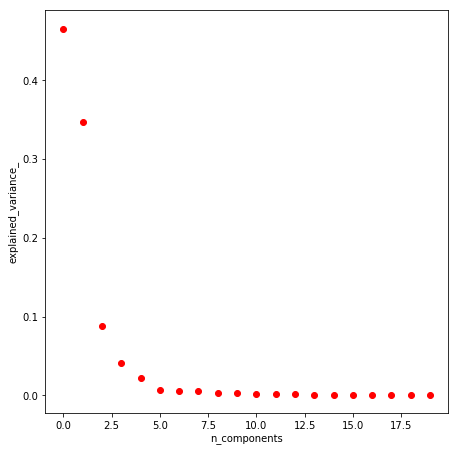

In [31]:
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_,'ro', linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [32]:
z=pca.transform(df.drop('idcli_horus',axis=1))
xproj=pca.inverse_transform(z)

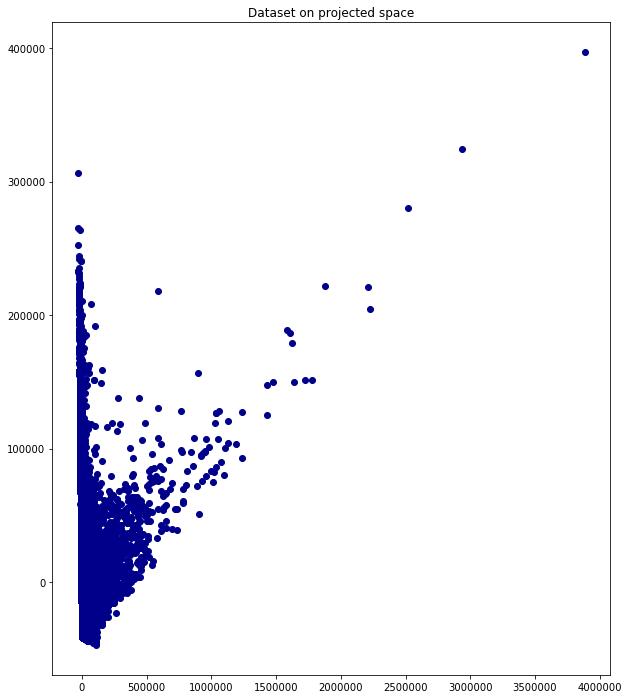

In [35]:
plt.figure(figsize=(10,12))
plt.clf()
plt.scatter(z[:,0],z[:,1],color='darkblue')
plt.title('Dataset on projected space')
plt.show()

In [49]:
dist_reconstruct=np.sum((xproj-np.array(df.drop('idcli_horus',axis=1)))**2,axis=1)

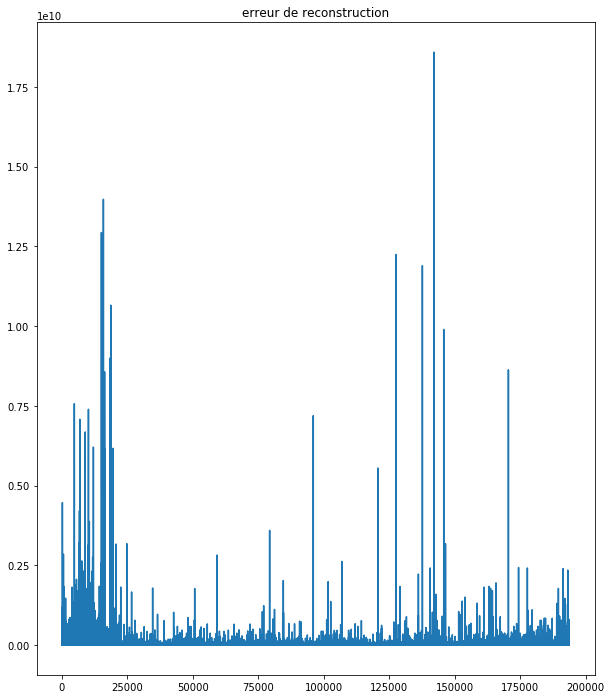

In [59]:
plt.figure(figsize=(10,12))
plt.clf()
plt.plot(dist_reconstruct)
plt.title('erreur de reconstruction')
plt.show()

In [76]:
n=100
weird=np.argpartition(dist_reconstruct, -n)[-n:]

In [77]:
use_colours = {"L": "darkblue", "A": "red"}
d=np.repeat("L",len(z))
d[weird]="A"

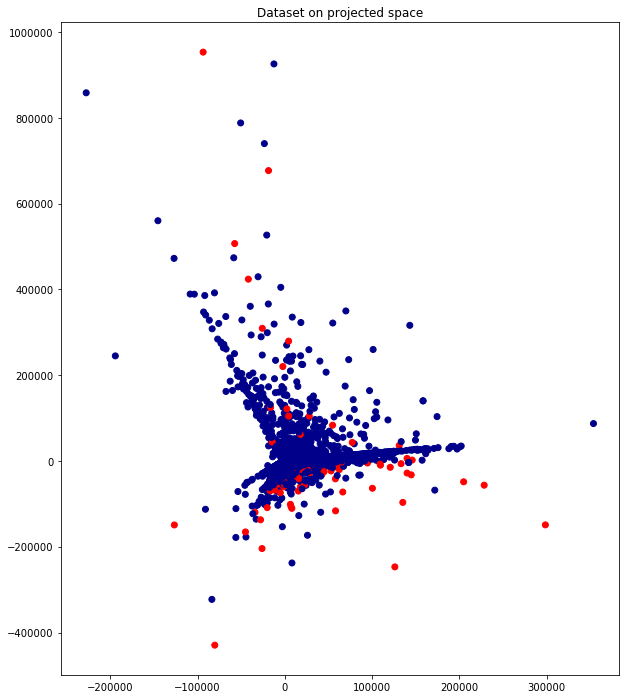

In [81]:
plt.figure(figsize=(10,12))
plt.clf()
plt.scatter(z[:,4],z[:,3],c=[use_colours[x[0]] for x in d])
plt.title('Dataset on projected space')
plt.show()